# Notebook to Solve the Kaggle Data Challenge
## Import Libs and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
from sklearn.preprocessing import MinMaxScaler # for Normalization
#import os

In [2]:
# Load the train and test datasets
train_df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

## Analysing the Data

In [3]:
def analyzeDataset(dataset):
    #Shape
    print("Shape: " + str(dataset.shape))
    # information about dtype non-null types
    dataset.info()
    # check for missing values in variables
    print("\n NaN values: ")
    print(dataset.isnull().sum())
    #Calculate the number of unique entries in the object fields
    distinct_vals = dataset.nunique(axis=0)
    print("\nDistinct Values: ")
    print(distinct_vals)
    #round(train_df.describe(),2)

### Train data set:

In [4]:
analyzeDataset(train_df)

# check distribution of target_class column
train_df['Depression'].value_counts()/float(len(train_df))

Shape: (140700, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                  

Depression
0    0.818287
1    0.181713
Name: count, dtype: float64

### Test data set:

In [5]:
analyzeDataset(test_df)

Shape: (93800, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-nu

## 1. Data clearing
### Drop rows:
* where dietary habits not healty, moderate and unhealty (-27)
* where sleep duration not <5, 5-6,7-8, >8 (-79)
### replace NaNs
* replace all professions of student to student
* replace all NaNs of working Professionals == true to working professional
### Transforming to int:
* Gender
* Working Professional or Student
* Sleep Duration 
* Dietary Habits 
* Have you ever had suicidal thoughts 
* Family backgorund 
* Profession 
* City
### Merge 
* academic and Work pressure -> pressure
* study and job satisfaction -> satisfaction
### Normalize Data:
### Drop Columns:
* Name: shouldn't influence classification
* id: shouldn't influence classification
* CGPA: 80% of the information is missing
### Alternatives to try:
* Use Academic Pressure and set all NaN to none Academic Pressure?
* Inlcude CGPA with dummy/default values
* drop rows with outliers (profession, degree)

### Drop rows:
* where dietary habits not healty, moderate and unhealty (-27) -> no adjusting of id

In [6]:
#Shape
print("Shape: " + str(train_df.shape))
train_df.drop(train_df[(train_df['Dietary Habits'] != 'Healthy') & (train_df['Dietary Habits'] != 'Unhealthy') & (train_df['Dietary Habits'] != 'Moderate')].index, inplace = True)
#Shape
print("Shape: " + str(train_df.shape))

Shape: (140700, 20)
Shape: (140673, 20)


* where sleep duration not <5, 5-6,7-8, >8 -> no adjusting of id

In [7]:
train_df.drop(train_df[(train_df['Sleep Duration'] != 'Less than 5 hours') & (train_df['Sleep Duration'] != 'More than 8 hours') & (train_df['Sleep Duration'] != '5-6 hours') & (train_df['Sleep Duration'] != '7-8 hours')].index, inplace = True)

In [8]:
# plot histogram to check distribution of columns with a lot of categories
def showHistograms():
    plt.figure(figsize=(24,20))
    plt.subplot(4, 1, 1)
    fig = train_df['Profession'].hist(bins=20)
    fig.set_xlabel('Profession')
    fig.set_ylabel('Number')
    plt.subplot(4, 1, 2)
    fig = train_df['CGPA'].hist(bins=20)
    fig.set_xlabel('CGPA')
    fig.set_ylabel('Number')
    plt.subplot(4, 1, 3)
    # plt.axis([40, 60, 0, 25])
    fig = train_df['Degree'].hist(bins=20)
    fig.set_xlabel('Degree')
    fig.set_ylabel('Number')
    plt.subplot(4, 1, 4)
    fig = train_df['Work/Study Hours'].hist(bins=20)
    fig.set_xlabel('Work/Study Hours')
    fig.set_ylabel('Number')

In [9]:
# showHistograms()

In [10]:
def fillEmptyCells(df: pd.DataFrame, source_col: str, target_col: str) -> pd.DataFrame:
    """
    Fills empty cells in the target column with values from the source column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    source_col (str): The name of the source column with non-empty values.
    target_col (str): The name of the target column where empty cells will be filled.
    
    Returns:
    pd.DataFrame: The DataFrame with empty cells in the target column filled.
    """
    # Fill empty cells in target_col with values from source_col
    df[target_col] = df[target_col].fillna(df[source_col])
    
    return df

In [11]:
train_df = fillEmptyCells(train_df, "Working Professional or Student", "Profession")
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [12]:
def convertObjectColumnsToIntegers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Konvertiert alle Spalten eines DataFrames mit Datentyp 'object' in Integer-Werte,
    wobei jede Kategorie einen eindeutigen Integer-Wert erhält.
    
    Parameter:
    df (pd.DataFrame): Der zu bearbeitende DataFrame
    
    Rückgabe:
    pd.DataFrame: Der DataFrame mit konvertierten Spalten
    dict: Ein Dictionary mit den Mappings von Kategorie-Strings zu Integer-Werten für jede Spalte
    """
    # Dictionary zum Speichern der Mapping-Informationen
    category_mappings = {}

    # Durchlaufen aller Spalten mit Datentyp 'object'
    for col in df.select_dtypes(include=['object']).columns:
        # Konvertieren der Spalte in Kategorien und Mapping-Informationen speichern
        df[col], category_map = pd.factorize(df[col])
        category_mappings[col] = dict(enumerate(category_map))


Convert object (string) categories into integer values

In [13]:
convertObjectColumnsToIntegers(train_df)

In [14]:
def mergeColumns(df: pd.DataFrame, col1: str, col2: str, col3: str) -> pd.DataFrame:
    """
    Merges two columns in a DataFrame, where each row has a float64 value in either one of the columns
    and NaN in the other. Creates a new column with the merged values.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    col1 (str): The name of the first column to merge.
    col2 (str): The name of the second column to merge.
    col3 (str): The name of the new column to store the merged values.
    
    Returns:
    pd.DataFrame: The DataFrame with a new column 'merged_column' containing the merged values.
    """
    # Create the merged column by filling NaNs in col1 with values from col2
    df[col3] = df[col1].combine_first(df[col2])
    df.drop(columns=[col1, col2], inplace=True)

    return df


In [15]:
train_df = mergeColumns(train_df, "Academic Pressure", "Work Pressure", "Pressure")
train_df = mergeColumns(train_df, "Study Satisfaction", "Job Satisfaction", "Satisfaction")

## Normalization

In [16]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Apply the MinMaxScaler to these columns and replace them in the DataFrame
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

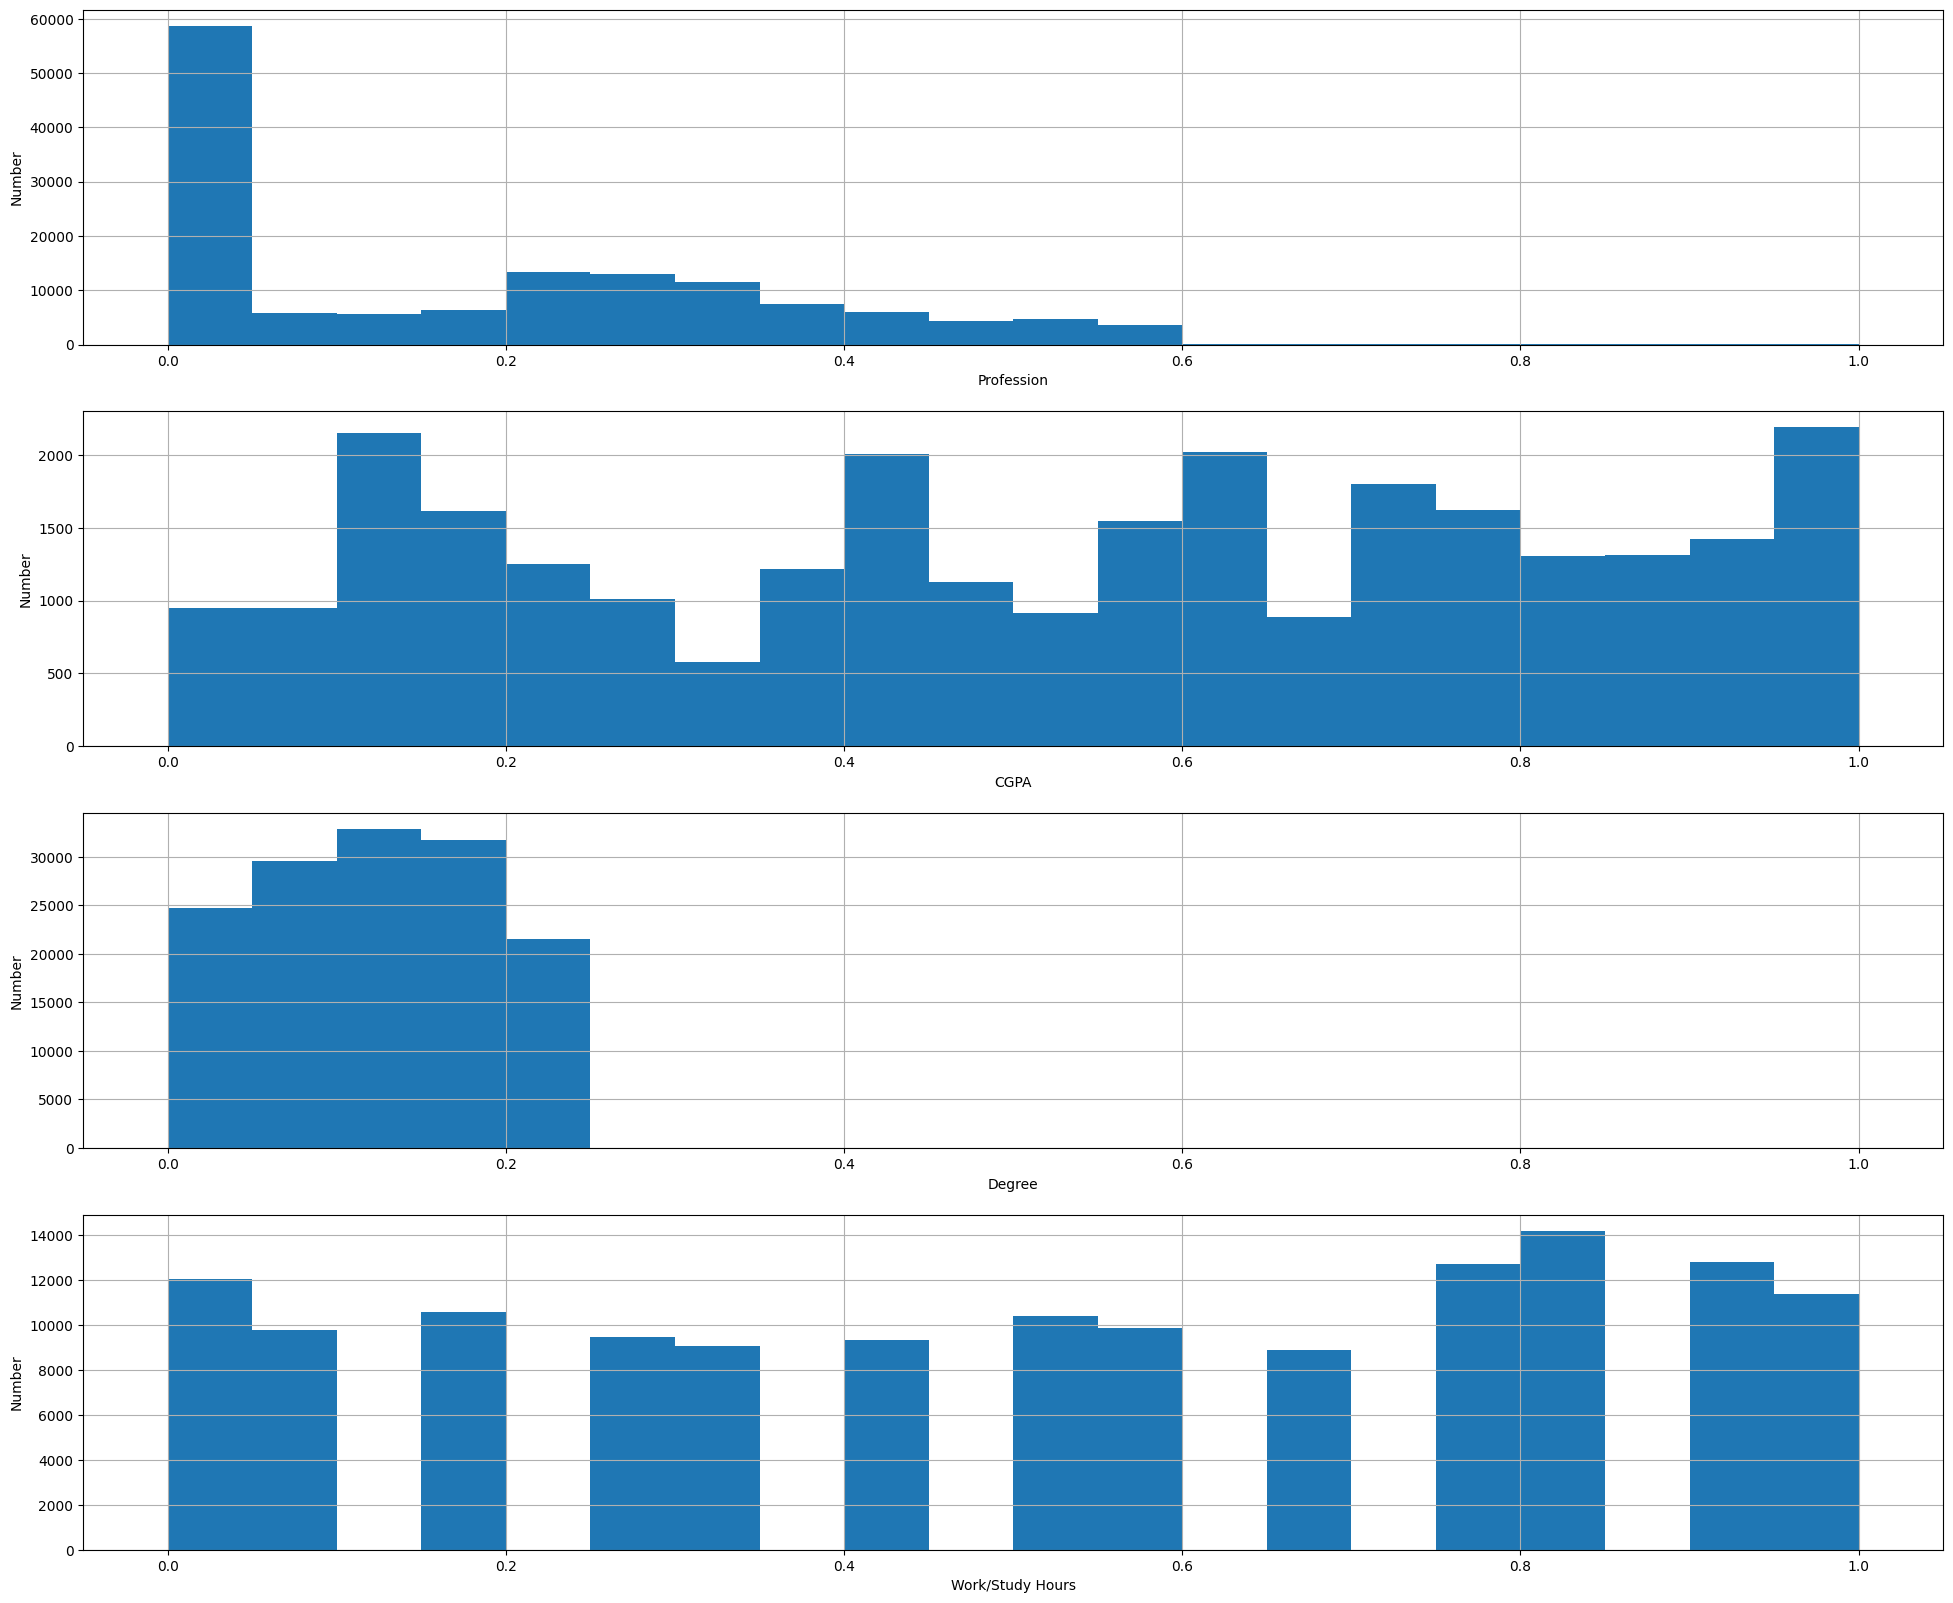

In [17]:
showHistograms()

In [18]:
# Split data to X and y
X = train_df.drop(columns=['id', 'Name', 'CGPA', 'Depression'])
y = train_df['Depression']